In [36]:
# Import necessary libraries
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualizations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets

#Load the data
data = pd.read_csv('/workspaces/bakery_sales_prediction/2_BaselineModel/00_Julius/test/data_simple.csv')



In [37]:
# Data split Zeitreihen
# Ensure the data is sorted by date
data = data.sort_values(by='Datum')
#print (data.head())

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])

# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
vali_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[data['Datum'] > validation_end_date]

# Check the dimensions of the datasets
print("Training dataset dimensions:", train_data.shape)
print("Validation dataset dimensions:", vali_data.shape)
print("Test dataset dimensions:", test_data.shape)



Training dataset dimensions: (7493, 24)
Validation dataset dimensions: (1841, 24)
Test dataset dimensions: (0, 24)


In [38]:
# Select features and target variable
# Anzahl und Art der Features durchtesten! --> MIT WENIG ANFANGEN!
features = ['Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3', 'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6', 'Temp_Very_Cold', 'Temp_Cold', 'Temp_Mild', 'Temp_Warm', 'Temp_Hot', 'Cloud_Clear', 'Cloud_Partly_Cloudy', 'Cloud_Cloudy', 'Wind_Light', 'Wind_Moderate', 'Wind_Strong', 'Weather_Good', 'Weather_Light_Issues', 'Weather_Moderate', 'Weather_Severe']
X_train = train_data[features]
y_train = train_data['Umsatz']  # Target variable: Umsatz
X_vali = vali_data[features]
y_vali = vali_data['Umsatz']

# Train a Stochastic Gradient Descent (SGD) Regressor
# Parameters:
# - max_iter: Maximum number of iterations for training.
# - learning_rate: Type of learning rate schedule ('invscaling' decreases learning rate over time).
# - eta0: Initial learning rate.
# sollte man den random state Parameter löschen, weil Zeitreihendaten??
sgd_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01)
sgd_model.fit(X_train, y_train)

SGDRegressor()

In [49]:
# Make predictions on the validation set
sgd_predictions = sgd_model.predict(X_vali)
print("Predictions for validation data:", sgd_predictions[:5])  # Display first 5 predictions
#print(sgd_predictions.head())
print(X_vali.head())
# Größe des Arrays anzeigen
print("Größe des Arrays (shape):", sgd_predictions.shape)
#print("X_vali:", X_vali[:5])  # Display first 5 predictions
x = 365*6
print("365*6 =")
print(x)

Predictions for validation data: [205.68107487 452.5823141  163.23201248 130.48338238 322.76344378]
      Warengruppe_1  Warengruppe_2  Warengruppe_3  Warengruppe_4  \
5100              0              0              1              0   
3281              0              1              0              0   
1462              1              0              0              0   
6866              0              0              0              1   
8685              0              0              0              0   

      Warengruppe_5  Warengruppe_6  Temp_Very_Cold  Temp_Cold  Temp_Mild  \
5100              0              0               0          0          0   
3281              0              0               0          0          0   
1462              0              0               0          0          0   
6866              0              0               0          0          0   
8685              1              0               0          0          0   

      Temp_Warm  ...  Cloud_Clear 

In [40]:
# Calculate error metrics
mae = mean_absolute_error(y_vali, sgd_predictions)  # Mean Absolute Error
mse = mean_squared_error(y_vali, sgd_predictions)  # Mean Squared Error
mape = (abs((y_vali - sgd_predictions) / y_vali).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 54.97
Mean Squared Error (MSE): 5984.36
Mean Absolute Percentage Error (MAPE): 34.51%


/tmp/ipykernel_4887/3258458632.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_vali.min(), y_vali.max()], [y_vali.min(), y_vali.max()], 'k--', color="red")


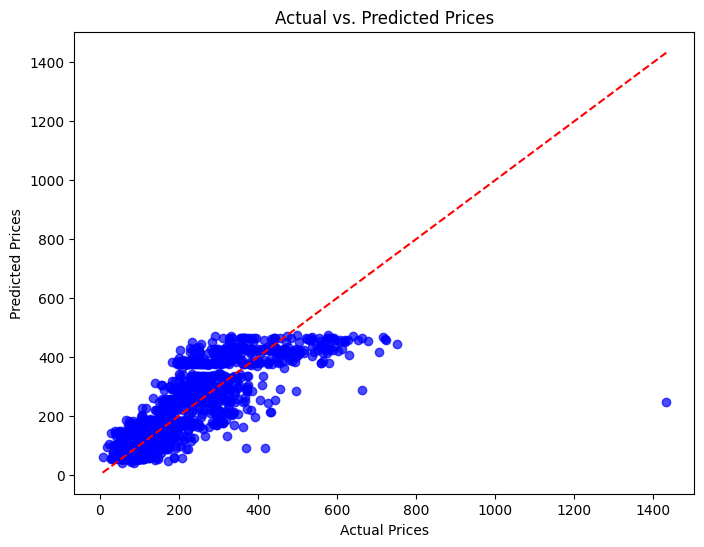

In [41]:
# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_vali, sgd_predictions, alpha=0.7, color="blue")
plt.plot([y_vali.min(), y_vali.max()], [y_vali.min(), y_vali.max()], 'k--', color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

/tmp/ipykernel_4887/378519196.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")


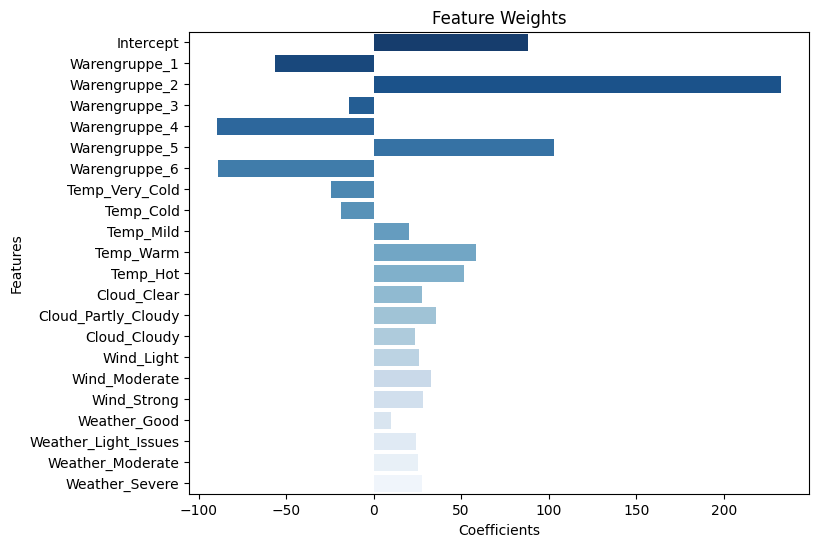

In [42]:
# Extract and display model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': [sgd_model.intercept_[0]] + list(sgd_model.coef_)
})
# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")
plt.title("Feature Weights")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()


In [43]:
# der ausreißer mit einem umsatz von ca. 1400 eur ist auffälig, wo war der umsatz?
# Das Datum mit dem höchsten Umsatz und den höchsten Umsatz ermitteln
max_umsatz_row = vali_data.loc[vali_data['Umsatz'].idxmax()]  # Zeile mit dem höchsten Umsatz

# Ergebnisse anzeigen
datum = max_umsatz_row['Datum']
umsatz = max_umsatz_row['Umsatz']

print(f"Datum mit dem höchsten Umsatz: {datum}")
print(f"Höchster Umsatz: {umsatz}")

# Das Datum mit dem höchsten Umsatz und den höchsten Umsatz ermitteln
max_umsatz_row = train_data.loc[train_data['Umsatz'].idxmax()]  # Zeile mit dem höchsten Umsatz

# Ergebnisse anzeigen
datum = max_umsatz_row['Datum']
umsatz = max_umsatz_row['Umsatz']

print(f"Datum mit dem höchsten Umsatz: {datum}")
print(f"Höchster Umsatz: {umsatz}")

Datum mit dem höchsten Umsatz: 2017-12-31 00:00:00
Höchster Umsatz: 1432.42234722783
Datum mit dem höchsten Umsatz: 2014-12-31 00:00:00
Höchster Umsatz: 1879.46183076734
